In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv


In [2]:
df=pd.read_csv('/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv')

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


We only need Date and Close columns for further steps, so separating those from the rest of the dataset

In [6]:
df = df[["Date", "Close"]]
print(df.head())

         Date        Close
0  2015-11-23  2086.590088
1  2015-11-24  2089.139893
2  2015-11-25  2088.870117
3  2015-11-26  2088.870117
4  2015-11-27  2090.110107


Visualise Close column variation 

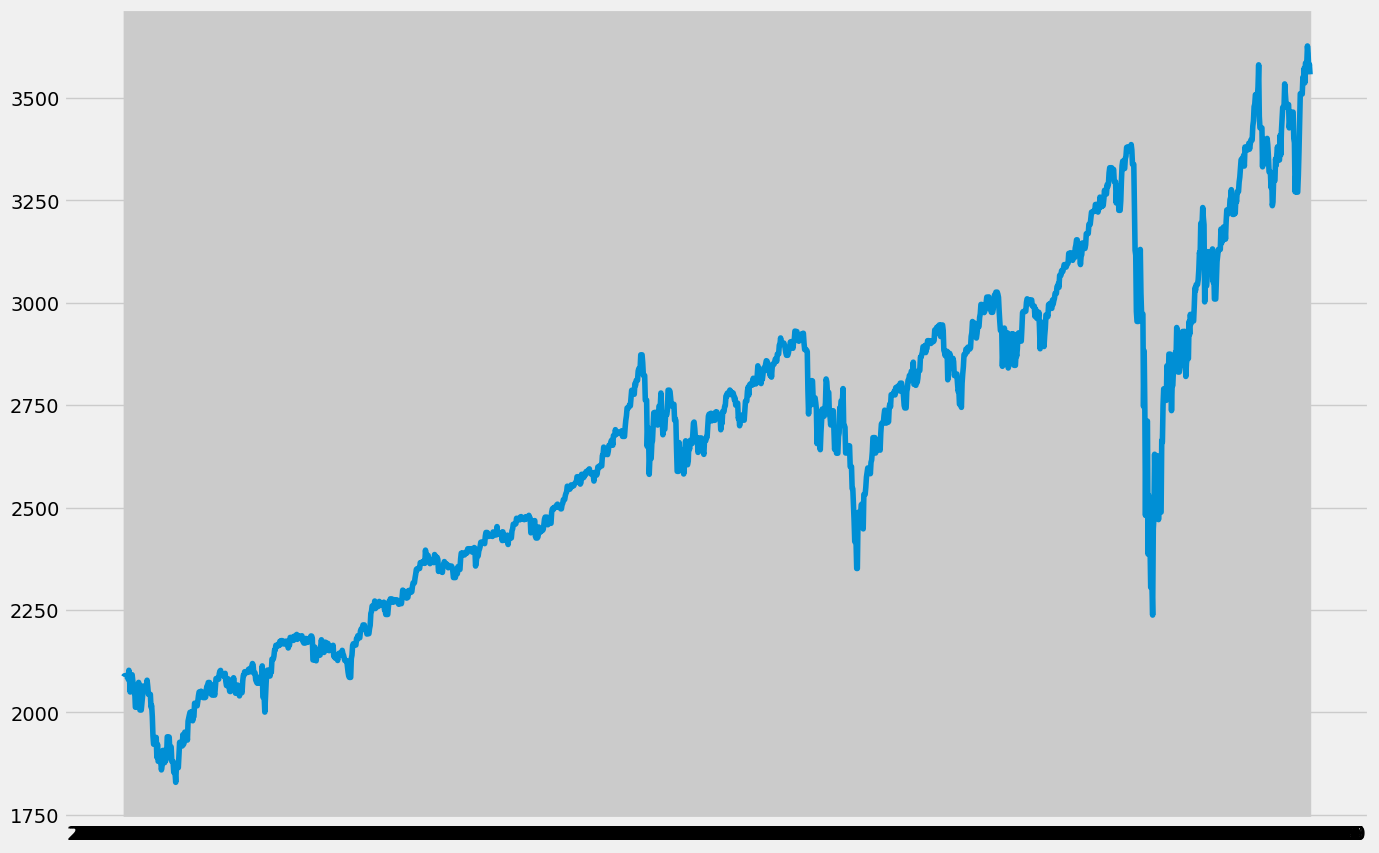

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(df["Date"], df["Close"])
plt.show()

For time series , we need to check if our data is seasonal or non-seasonal - above plot shows its seasonal.So,we need to use SARIMA instead of ARIMA 

For ARIMA/SARIMA , we need to find p,d,q values before proceeding

We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot.

The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. 

As our data is seasonal, we should use 1 as the d value.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

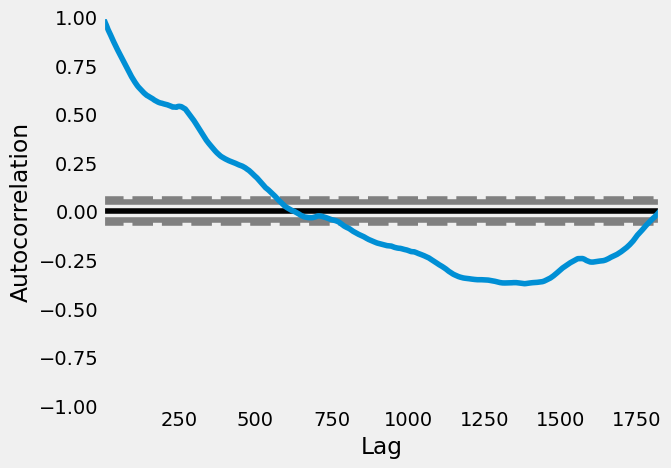

In [8]:
pd.plotting.autocorrelation_plot(df["Close"])

Here, if we see the lag , the curve moves down after the 6th line , so we take p=5 ignoring the first line

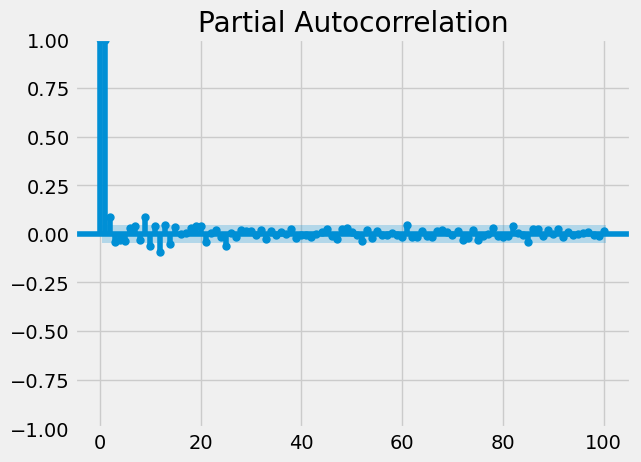

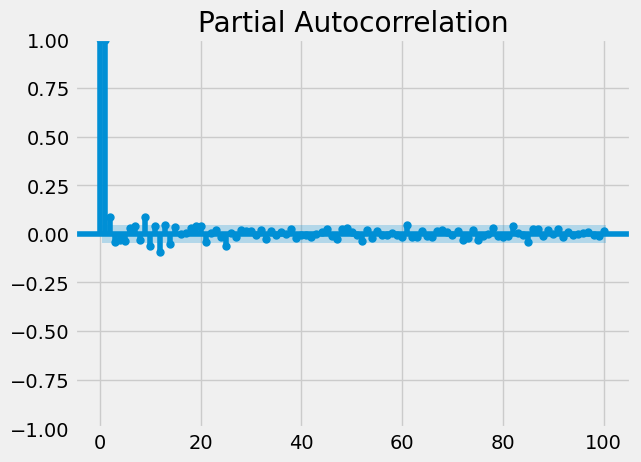

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

In the above plot,we have only two values far away from other points, hence q=2

**SARIMA MODEL**

In [10]:
p, d, q = 5, 1, 2
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.83303D+00    |proj g|=  2.20213D-01


 This problem is unconstrained.



At iterate    5    f=  4.80878D+00    |proj g|=  9.86925D-02

At iterate   10    f=  4.77631D+00    |proj g|=  4.06526D-02

At iterate   15    f=  4.72235D+00    |proj g|=  5.86019D-02

At iterate   20    f=  4.68768D+00    |proj g|=  7.20483D-02

At iterate   25    f=  4.68599D+00    |proj g|=  2.15400D-02

At iterate   30    f=  4.68512D+00    |proj g|=  1.42367D-02

At iterate   35    f=  4.68509D+00    |proj g|=  1.49239D-03

At iterate   40    f=  4.68501D+00    |proj g|=  2.06010D-02

At iterate   45    f=  4.68455D+00    |proj g|=  9.16440D-03

At iterate   50    f=  4.68442D+00    |proj g|=  1.86862D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1825
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -8549.075
Date:                            Wed, 07 Aug 2024   AIC                          17128.149
Time:                                    08:48:27   BIC                          17210.682
Sample:                                         0   HQIC                         17158.605
                                           - 1825                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0115      0.027     -0.423      0.672      -0.065       0.042
ar.L2         -0.8325      0.026   

Predictions for next 30 days

In [11]:
predictions = model.predict(len(df), len(df)+30)
print(predictions)

1825    3549.848586
1826    3549.043777
1827    3547.720368
1828    3548.443267
1829    3543.567038
1830    3543.464490
1831    3544.620121
1832    3545.935294
1833    3544.629731
1834    3551.230897
1835    3557.050211
1836    3564.448918
1837    3564.678102
1838    3565.635509
1839    3566.600497
1840    3570.573678
1841    3571.147102
1842    3571.897066
1843    3570.860805
1844    3571.703325
1845    3571.178519
1846    3568.438492
1847    3572.741840
1848    3578.734044
1849    3580.379902
1850    3579.495787
1851    3579.241409
1852    3582.033016
1853    3582.630850
1854    3578.903726
1855    3574.418054
Name: predicted_mean, dtype: float64


<Axes: >

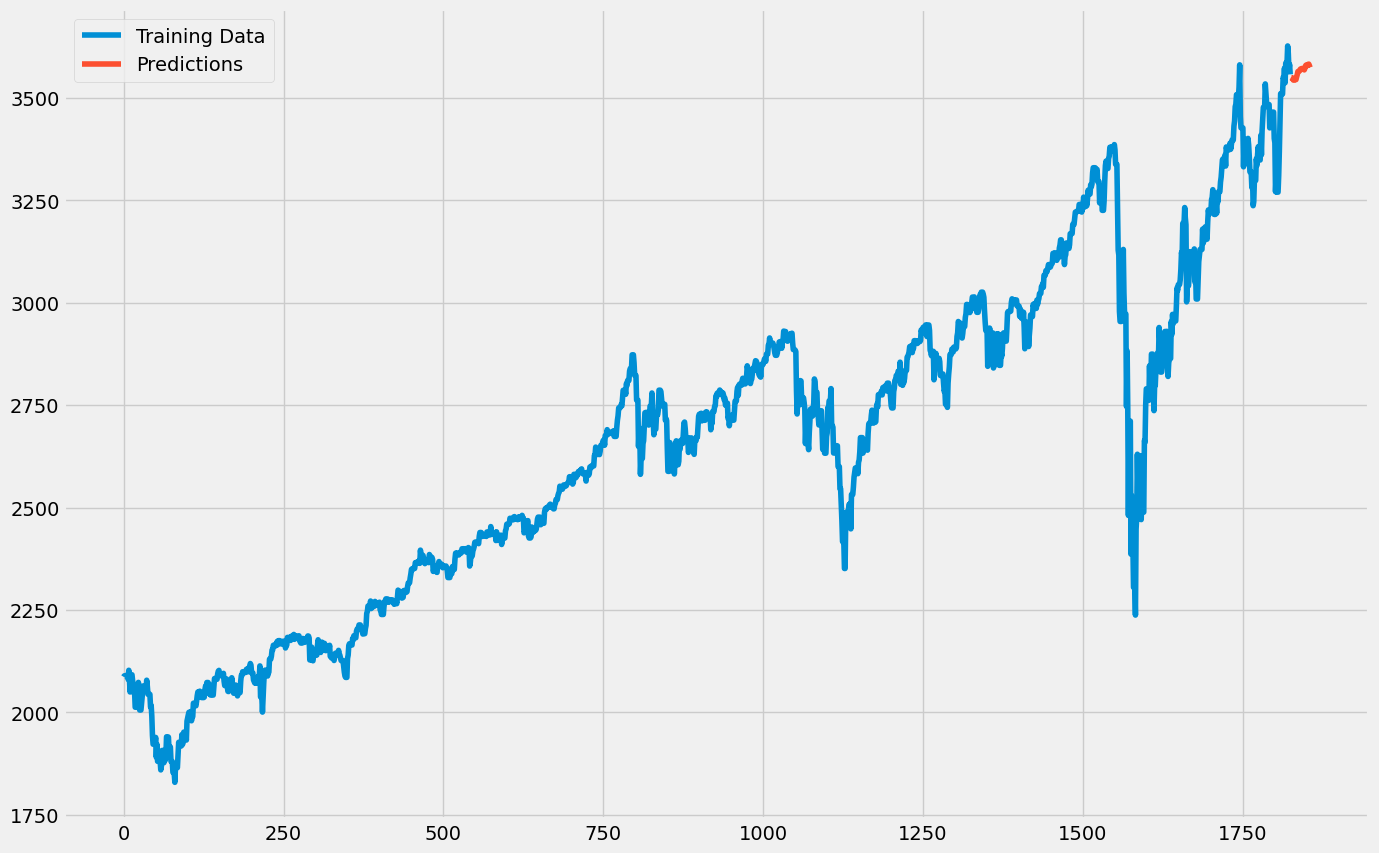

In [12]:
df["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

Thus, we have calculated predictions using Time Series. Feedbacks are most welcome !